In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [251]:
data = pd.read_csv("C:\\Users\\RUSHIKESH\\Downloads\\expenses.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory data analysis :- 

In [252]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


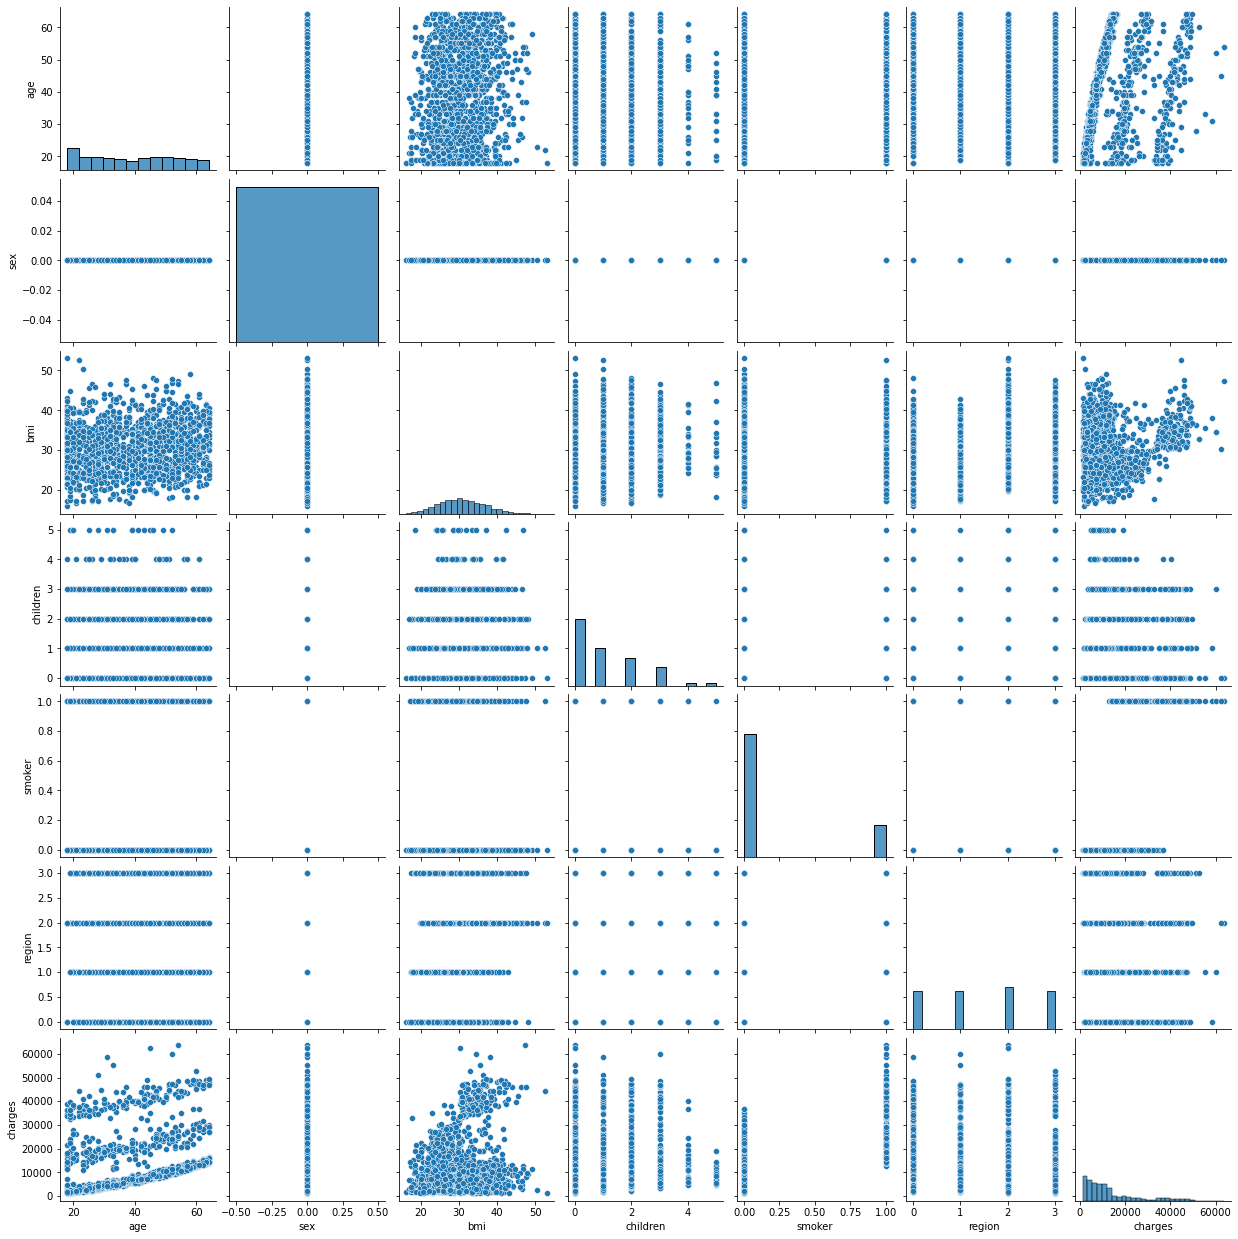

In [39]:
sn.pairplot(clean_data)

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

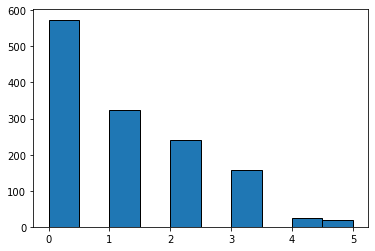

In [5]:
plt.hist(data.children, edgecolor='black')

{'whiskers': [<matplotlib.lines.Line2D at 0x236eabe2b20>,
 'caps': [<matplotlib.lines.Line2D at 0x236eabf4220>,
 'boxes': [<matplotlib.lines.Line2D at 0x236eabe2790>],
 'medians': [<matplotlib.lines.Line2D at 0x236eabf48e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x236eabf4c40>],
 'means': []}

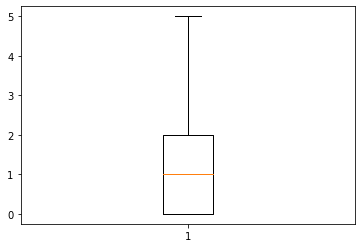

In [6]:
plt.boxplot(data.children)

### we check with all features there no any outlier present in our data 

In [7]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
clean_data = data.drop_duplicates()

clean_data.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

clean_data['sex'] = label_encoder.fit_transform(clean_data['sex'])
clean_data['smoker'] = label_encoder.fit_transform(clean_data['smoker'])
clean_data['region'] = label_encoder.fit_transform(clean_data['region'])

<ipython-input-29-cd2b849d8db5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['sex'] = label_encoder.fit_transform(clean_data['sex'])
<ipython-input-29-cd2b849d8db5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['smoker'] = label_encoder.fit_transform(clean_data['smoker'])
<ipython-input-29-cd2b849d8db5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [34]:
clean_data['region'].value_counts()

2    364
3    325
0    324
1    324
Name: region, dtype: int64

In [31]:
### Divingg the data :-

In [33]:
X = clean_data.iloc[:,:-1]
Y = clean_data.iloc[:,-1]

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
x_train, x_test , y_train, y_test = train_test_split(X,Y , test_size=0.25)

## Model Building :-

 ## linear_model :-

In [40]:
from sklearn.linear_model import LinearRegression 

In [41]:
model_1 = LinearRegression()

In [42]:
model_1.fit(x_train, y_train)

LinearRegression()

In [67]:
pred_linear = model_1.predict(x_test)

In [51]:
def RMSE(actual, predict):
    resule = np.sqrt(np.mean(actual-predict)**2)
    return resule

In [53]:
rmse_linear = RMSE(y_test, pred_linear)
rmse_linear

30.18820890737723

## Decision Tree :-

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
model_2 = DecisionTreeRegressor()

In [56]:
model_2.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
pred_deci_tree = model_2.predict(x_test)

In [70]:
rmse_deci_tree = RMSE(y_test, pred_deci_tree)
rmse_deci_tree

219.78672549253704

## Ridge Regression :- 

In [71]:
from sklearn.linear_model import Ridge

In [72]:
model_3 = Ridge(alpha=1)

In [73]:
model_3.fit(x_train, y_train)

Ridge(alpha=1)

In [74]:
pred_ridge = model_3.predict(x_test)

In [75]:
rmse_ridge = RMSE(y_test, pred_ridge)
rmse_ridge

29.858065743858567

## lasso Regularization :- 

In [76]:
from sklearn.linear_model import Lasso

In [77]:
model_4 = Lasso(alpha=1)


In [78]:
model_4.fit(x_train, y_train)

Lasso(alpha=1)

In [79]:
pred_lasso = model_4.predict(x_test)

In [81]:
rmse_lasso = RMSE(y_test, pred_lasso)
rmse_lasso

30.164206184607007

## K-Nearest Neighbor :- 

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [85]:
k_values = np.array(range(3,40,2))

param_grid = dict(n_neighbors=k_values )
param_grid

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39])}

In [90]:
model = KNeighborsRegressor()

In [91]:
model_5 = GridSearchCV(estimator = model , param_grid = param_grid)

In [92]:
model_5.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [94]:
print(model_5.best_score_)
print(model_5.best_params_)

0.16418646971716933
{'n_neighbors': 9}


In [95]:
pred_knn = model_5.predict(x_test)

In [96]:
rmse_knn = RMSE(y_test, pred_knn)
rmse_knn

632.0903776295188

## Bagging Regressor :-

In [98]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [99]:
model = DecisionTreeRegressor ()

In [107]:
num_trees = np.array([100,150,200,250,300,400])

param_grid = dict(n_estimators = num_trees,  base_estimator = [model])
param_grid

{'n_estimators': array([100, 150, 200, 250, 300, 400]),
 'base_estimator': [DecisionTreeRegressor()]}

In [108]:
model_6 = GridSearchCV(estimator = BaggingRegressor(), param_grid=param_grid)

In [109]:
model_6.fit(x_train, y_train)

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor()],
                         'n_estimators': array([100, 150, 200, 250, 300, 400])})

In [110]:
print(model_6.best_score_)
print(model_6.best_params_)

0.8401706669788244
{'base_estimator': DecisionTreeRegressor(), 'n_estimators': 150}


In [112]:
pred_bagg = model_6.predict(x_test)

In [113]:
rmse_bagg = RMSE(y_test, pred_bagg)
rmse_bagg

329.88743600881753

## Random Forest technique :-

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
model = RandomForestRegressor()

In [116]:
num_trees = np.array([100,150,200,250,300,400])
max_features = np.array([3,4,5,6])
model = RandomForestRegressor()

param_grid = dict(n_estimators = num_trees, max_features = max_features  )
param_grid

{'n_estimators': array([100, 150, 200, 250, 300, 400]),
 'max_features': array([3, 4, 5, 6])}

In [117]:
model_7 = GridSearchCV(estimator = model , param_grid = param_grid)

In [118]:
model_7.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': array([3, 4, 5, 6]),
                         'n_estimators': array([100, 150, 200, 250, 300, 400])})

In [119]:
print(model_7.best_score_)
print(model_7.best_params_)

0.8481157070862062
{'max_features': 3, 'n_estimators': 300}


In [120]:
pred_randf = model_7.predict(x_test)

In [121]:
rmse_randf = RMSE(y_test, pred_randf)
rmse_randf

159.88314460306034

## AdaBoost Technique :- 

In [122]:
from sklearn.ensemble import AdaBoostRegressor

In [124]:
model = AdaBoostRegressor()

In [126]:
n_estimators = np.array(range(3,40,2))
learning_rate = np.array([0.1,0.5,1,0.7])


param_grid = dict(n_estimators = n_estimators, learning_rate =  learning_rate)
param_grid

{'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39]),
 'learning_rate': array([0.1, 0.5, 1. , 0.7])}

In [127]:
model_8 = GridSearchCV(estimator = model, param_grid = param_grid)

In [130]:
model_8.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': array([0.1, 0.5, 1. , 0.7]),
                         'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [131]:
print(model_8.best_score_)
print(model_8.best_params_)

0.8481830628821578
{'learning_rate': 0.1, 'n_estimators': 5}


In [132]:
pred_adaboost = model_8.predict(x_test)

In [133]:
rmse_adaboost = RMSE(y_test, pred_adaboost)
rmse_adaboost

295.4682607136101

## Extreme Gradient Boosting :-

In [134]:
from xgboost import XGBRegressor

In [135]:
model = XGBRegressor()

In [142]:
n_estimators = np.array([200,300,350,400,550,1000, 800]) 
max_depth = np.array([ 3,5,7,6])
learning_rate = np.array([0.1,0.5,1,0.7])

param_grid = dict(n_estimators = n_estimators, max_depth = max_depth, learning_rate =  learning_rate)
param_grid

{'n_estimators': array([ 200,  300,  350,  400,  550, 1000,  800]),
 'max_depth': array([3, 5, 7, 6]),
 'learning_rate': array([0.1, 0.5, 1. , 0.7])}

In [143]:
model_9 = GridSearchCV(estimator=model, param_grid=param_grid)

In [144]:
model_9.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [145]:
print(model_9.best_score_)
print(model_9.best_params_)

0.8529841777412163
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [146]:
pred_xgb = model_9.predict(x_test)

In [147]:
rmse_xgb = RMSE(y_test, pred_xgb)
rmse_xgb

19.848014482217824

## Artificial neural network :-

In [195]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [210]:
model = Sequential()
model.add(layers.Dense(8, input_dim=6 ))
model.add(layers.Dense(5, activation='linear'))
model.add(layers.Dense(1))


In [211]:
#help(model.compile)

In [212]:
model.compile (loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [206]:
# model_new = KerasClassifier(model)

In [197]:
# model.fit(x_train, y_train,  epochs=250, batch_size=10)

In [207]:
#batch_size = np.array([10,20,25])
#epochs = np.array([100, 250, 400])

#param_grid = dict(batch_size = batch_size ,epochs = epochs )
#param_grid


In [208]:
# model_10 = GridSearchCV(estimator = model_new, param_grid=param_grid)

In [200]:
#from sklearn.preprocessing import StandardScaler

In [201]:
#a = StandardScaler()
#a.fit(x_train)
#x_train_std = a.transform(x_train)

In [215]:
model.fit(x_train, y_train,  epochs=250, batch_size=10)

Epoch 1/250
101/101 [==============================] - 0s 2ms/step - loss: 43428664.0000 - accuracy: 0.0000e+00
Epoch 2/250
101/101 [==============================] - 0s 2ms/step - loss: 43022736.0000 - accuracy: 0.0000e+00
Epoch 3/250
101/101 [==============================] - 0s 2ms/step - loss: 42737552.0000 - accuracy: 0.0000e+00
Epoch 4/250
101/101 [==============================] - 0s 2ms/step - loss: 42384288.0000 - accuracy: 0.0000e+00
Epoch 5/250
101/101 [==============================] - 0s 2ms/step - loss: 42160184.0000 - accuracy: 0.0000e+00
Epoch 6/250
101/101 [==============================] - 0s 2ms/step - loss: 41911072.0000 - accuracy: 0.0000e+00
Epoch 7/250
101/101 [==============================] - 0s 2ms/step - loss: 41604724.0000 - accuracy: 0.0000e+00
Epoch 8/250
101/101 [==============================] - 0s 2ms/step - loss: 41397868.0000 - accuracy: 0.0000e+00
Epoch 9/250
101/101 [==============================] - 0s 1ms/step - loss: 41165688.0000 - accuracy: 0.0

101/101 [==============================] - 0s 1ms/step - loss: 38707592.0000 - accuracy: 0.0000e+00
Epoch 74/250
101/101 [==============================] - 0s 1ms/step - loss: 38671384.0000 - accuracy: 0.0000e+00
Epoch 75/250
101/101 [==============================] - 0s 1ms/step - loss: 38607780.0000 - accuracy: 0.0000e+00
Epoch 76/250
101/101 [==============================] - 0s 1ms/step - loss: 38697380.0000 - accuracy: 0.0000e+00
Epoch 77/250
101/101 [==============================] - 0s 1ms/step - loss: 38753976.0000 - accuracy: 0.0000e+00
Epoch 78/250
101/101 [==============================] - 0s 2ms/step - loss: 38621784.0000 - accuracy: 0.0000e+00
Epoch 79/250
101/101 [==============================] - 0s 2ms/step - loss: 38594252.0000 - accuracy: 0.0000e+00
Epoch 80/250
101/101 [==============================] - 0s 2ms/step - loss: 38834648.0000 - accuracy: 0.0000e+00
Epoch 81/250
101/101 [==============================] - 0s 1ms/step - loss: 38620440.0000 - accuracy: 0.0000e

101/101 [==============================] - 0s 1ms/step - loss: 38119424.0000 - accuracy: 0.0000e+00
Epoch 146/250
101/101 [==============================] - 0s 1ms/step - loss: 38129732.0000 - accuracy: 0.0000e+00
Epoch 147/250
101/101 [==============================] - 0s 1ms/step - loss: 38212816.0000 - accuracy: 0.0000e+00
Epoch 148/250
101/101 [==============================] - 0s 1ms/step - loss: 38160700.0000 - accuracy: 0.0000e+00
Epoch 149/250
101/101 [==============================] - 0s 920us/step - loss: 38126196.0000 - accuracy: 0.0000e+00
Epoch 150/250
101/101 [==============================] - 0s 1ms/step - loss: 38111120.0000 - accuracy: 0.0000e+00
Epoch 151/250
101/101 [==============================] - 0s 1ms/step - loss: 38146720.0000 - accuracy: 0.0000e+00
Epoch 152/250
101/101 [==============================] - 0s 1ms/step - loss: 38090896.0000 - accuracy: 0.0000e+00
Epoch 153/250
101/101 [==============================] - 0s 1ms/step - loss: 38107428.0000 - accurac

101/101 [==============================] - 0s 959us/step - loss: 37814132.0000 - accuracy: 0.0000e+00
Epoch 217/250
101/101 [==============================] - 0s 900us/step - loss: 37785540.0000 - accuracy: 0.0000e+00
Epoch 218/250
101/101 [==============================] - 0s 1ms/step - loss: 37663012.0000 - accuracy: 0.0000e+00
Epoch 219/250
101/101 [==============================] - 0s 1ms/step - loss: 37785420.0000 - accuracy: 0.0000e+00
Epoch 220/250
101/101 [==============================] - 0s 1ms/step - loss: 37748820.0000 - accuracy: 0.0000e+00
Epoch 221/250
101/101 [==============================] - 0s 1ms/step - loss: 37830780.0000 - accuracy: 0.0000e+00
Epoch 222/250
101/101 [==============================] - 0s 1ms/step - loss: 37736888.0000 - accuracy: 0.0000e+00
Epoch 223/250
101/101 [==============================] - 0s 2ms/step - loss: 37731812.0000 - accuracy: 0.0000e+00
Epoch 224/250
101/101 [==============================] - 0s 1ms/step - loss: 37819280.0000 - accur

##  we will build our final model whose RMSE is less :-

In [240]:
rmse_ =  {'Models' : ('linear_model ' , 'Decision Tree', 'Ridge Regression' , 'Lasso regularization',
                                    'KNN', 'Bagging Regressor ', 'Random Forest Technique' , 'AdaBoost Technique' ,
                                     'Extreme Gradient Boosting' ),
                        'RMSE' : (rmse_linear, rmse_deci_tree, rmse_ridge, rmse_lasso , rmse_knn , rmse_bagg,
                                    rmse_randf, rmse_adaboost ,  rmse_xgb) }

In [241]:
rmse_df = pd.DataFrame(rmse_)

In [244]:
rmse_df.sort_values('RMSE', ascending=True)

,Models,RMSE
8,Extreme Gradient Boosting,19.848014
2,Ridge Regression,29.858066
3,Lasso regularization,30.164206
0,linear_model,30.188209
6,Random Forest Technique,159.883145
1,Decision Tree,219.786725
7,AdaBoost Technique,295.468261
5,Bagging Regressor,329.887436
4,KNN,632.090378


In [247]:
final_model = model = XGBRegressor(learning_rate=0.1, max_depth = 3, n_estimators = 200)

In [248]:
final_model.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
prediction = final_model.predict(new_data)